In [ ]:
import pandas as pd
from load_data import load_data
from convolutional_NN import train_classifier
from functional_square_loss import functional_square_loss
from plotnine import ggplot, geom_line, aes, labs
from functional_square_hinge_loss import functional_square_hinge_loss
from naive_square_loss import naive_square_loss
from naive_square_hinge_loss import naive_square_hinge_loss

trainloader, testloader = load_data()
train_results = train_classifier(trainloader, testloader, functional_square_loss)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
import numpy as np
idx = np.arange(0,50)
full_dict = dict(zip(idx,train_results))
train_results_df = pd.DataFrame(full_dict[0], index=[0])
for num_epochs in range(1,10):
    temp = pd.DataFrame(full_dict[num_epochs], index=[0])
    combine = [train_results_df, temp]
    train_results_df = pd.concat(combine)
train_results_df

,loss,train_auc,test_auc,epoch,lr
0,6.237775e+06,0.500161,0.5,0,0.1
0,6.238278e+06,0.500000,0.5,1,0.1
0,6.236842e+06,0.500000,0.5,2,0.1
0,6.236188e+06,0.500000,0.5,3,0.1
0,6.236666e+06,0.500000,0.5,4,0.1
0,6.236880e+06,0.500000,0.5,5,0.1
0,6.237640e+06,0.500000,0.5,6,0.1
0,6.237626e+06,0.500000,0.5,7,0.1
0,6.238718e+06,0.500000,0.5,8,0.1
0,6.232012e+06,0.500000,0.5,9,0.1


In [79]:
full_dict[1]


{'loss': 6237478.0, 'train_auc': 0.5, 'test_auc': 0.5, 'epoch': 1, 'lr': 0.1}

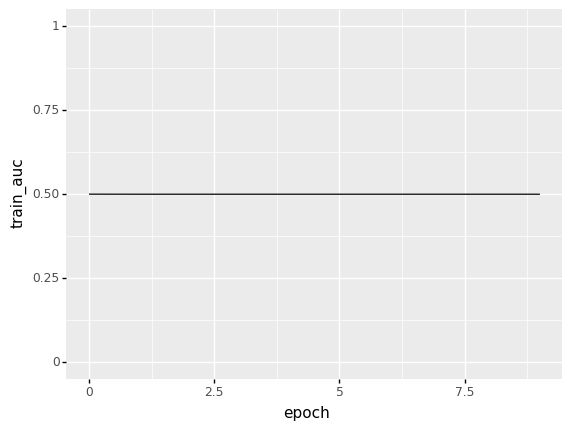

<ggplot: (8779279221751)>

In [9]:
from plotnine import ylim
(ggplot(data=train_results_df)
    + aes(x='epoch',y='train_auc')
    + geom_line()
    + ylim(0,1))